Error fetching price series for BSV
Error fetching price series for CRO
Error fetching price series for XCN


/Users/markszulyovszky/micromamba/envs/lab-backend/lib/python3.12/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
/Users/markszulyovszky/micromamba/envs/lab-backend/lib/python3.12/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change(period)
/Users/markszulyovszky/micromamba/envs/lab-backend/lib/python3.12/site-packages/alphalens/utils.py:308: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future versi

Dropped 1.3% entries from factor data: 1.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 50.0%, not exceeded: OK!
Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,0.174660,0.992991,0.916723,0.041614,20783,20.622966
2,0.828429,0.984965,0.939069,0.026850,19835,19.682266
3,0.856269,0.998878,0.950015,0.024575,19905,19.751727
4,0.880614,1.016938,0.961481,0.023024,19835,19.682266
5,0.898700,3.987582,0.993206,0.128840,20418,20.260776


Returns Analysis


,1D,5D,10D
Ann. alpha,0.267,0.236,0.193
beta,-0.044,-0.036,-0.008
Mean Period Wise Return Top Quantile (bps),9.786,5.357,3.757
Mean Period Wise Return Bottom Quantile (bps),-6.435,-6.764,-5.943
Mean Period Wise Spread (bps),16.222,11.902,9.506


<Figure size 640x480 with 0 Axes>

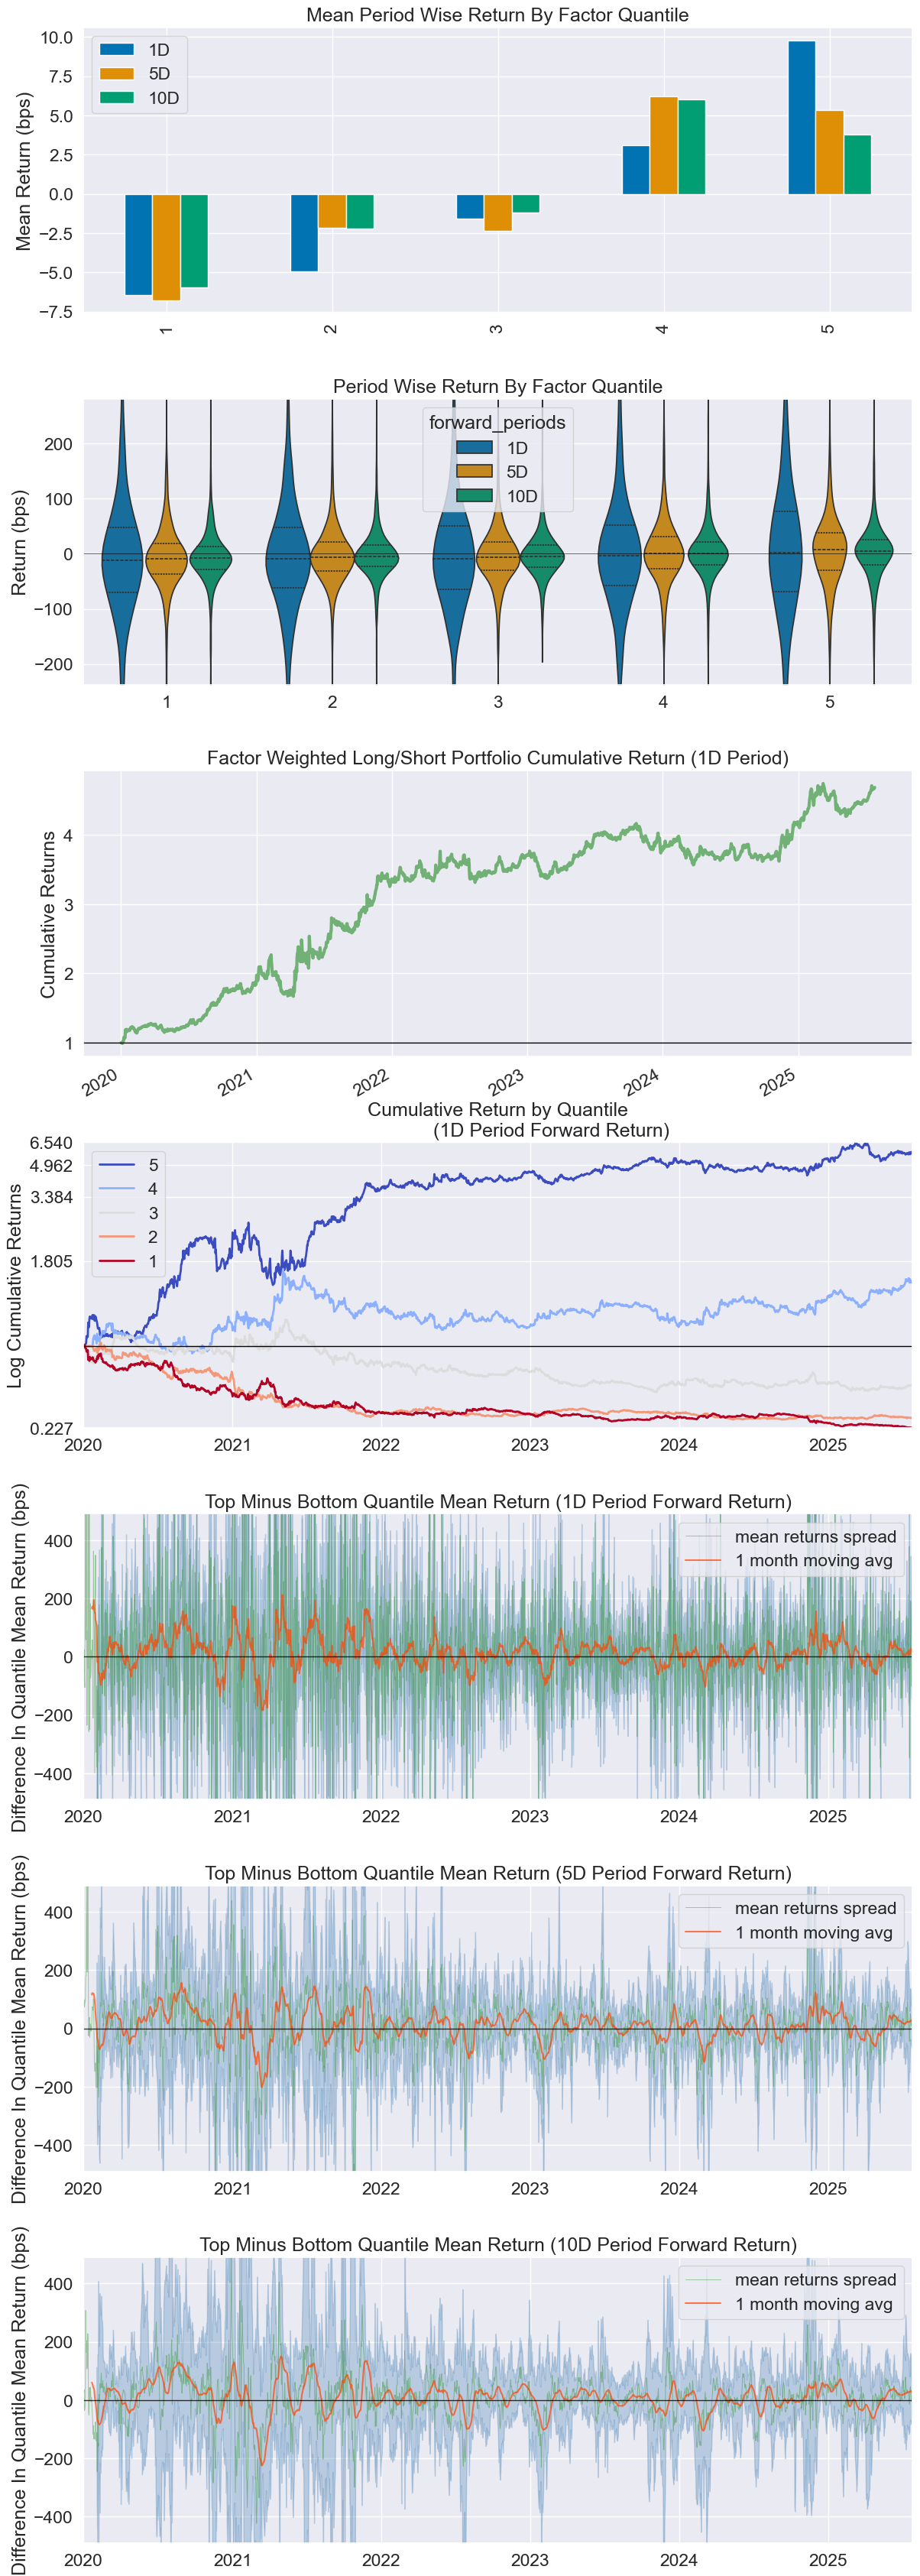

Information Analysis


,1D,5D,10D
IC Mean,0.017,0.044,0.051
IC Std.,0.207,0.207,0.209
Risk-Adjusted IC,0.080,0.211,0.245
t-stat(IC),3.598,9.494,11.072
p-value(IC),0.000,0.000,0.000
IC Skew,0.006,0.178,-0.254
IC Kurtosis,2.272,1.728,2.118


/Users/markszulyovszky/micromamba/envs/lab-backend/lib/python3.12/site-packages/alphalens/performance.py:118: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouper.append(pd.Grouper(freq=by_time))


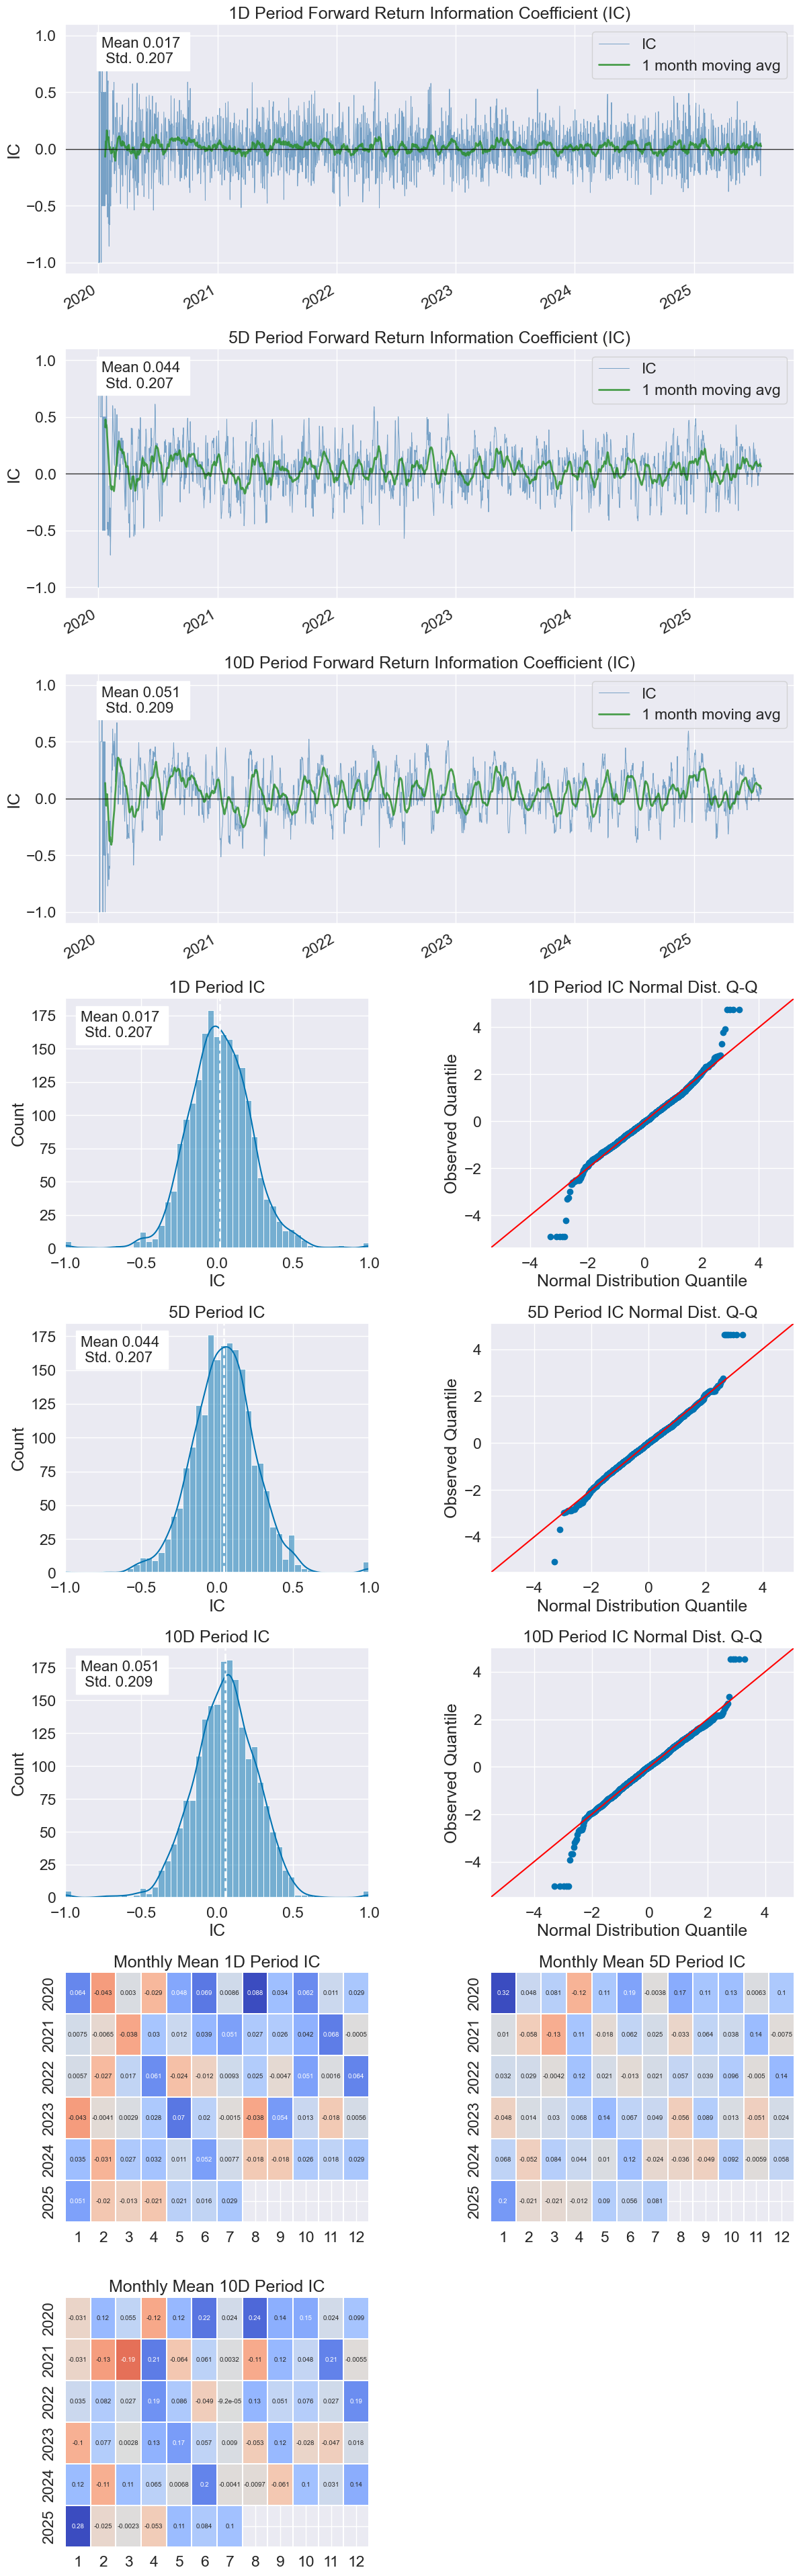

/Users/markszulyovszky/micromamba/envs/lab-backend/lib/python3.12/site-packages/alphalens/utils.py:928: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


,1D,5D,10D
Quantile 1 Mean Turnover,0.090,0.223,0.339
Quantile 2 Mean Turnover,0.222,0.475,0.607
Quantile 3 Mean Turnover,0.253,0.522,0.644
Quantile 4 Mean Turnover,0.215,0.465,0.600
Quantile 5 Mean Turnover,0.085,0.209,0.322


,1D,5D,10D
Mean Factor Rank Autocorrelation,0.982,0.902,0.788


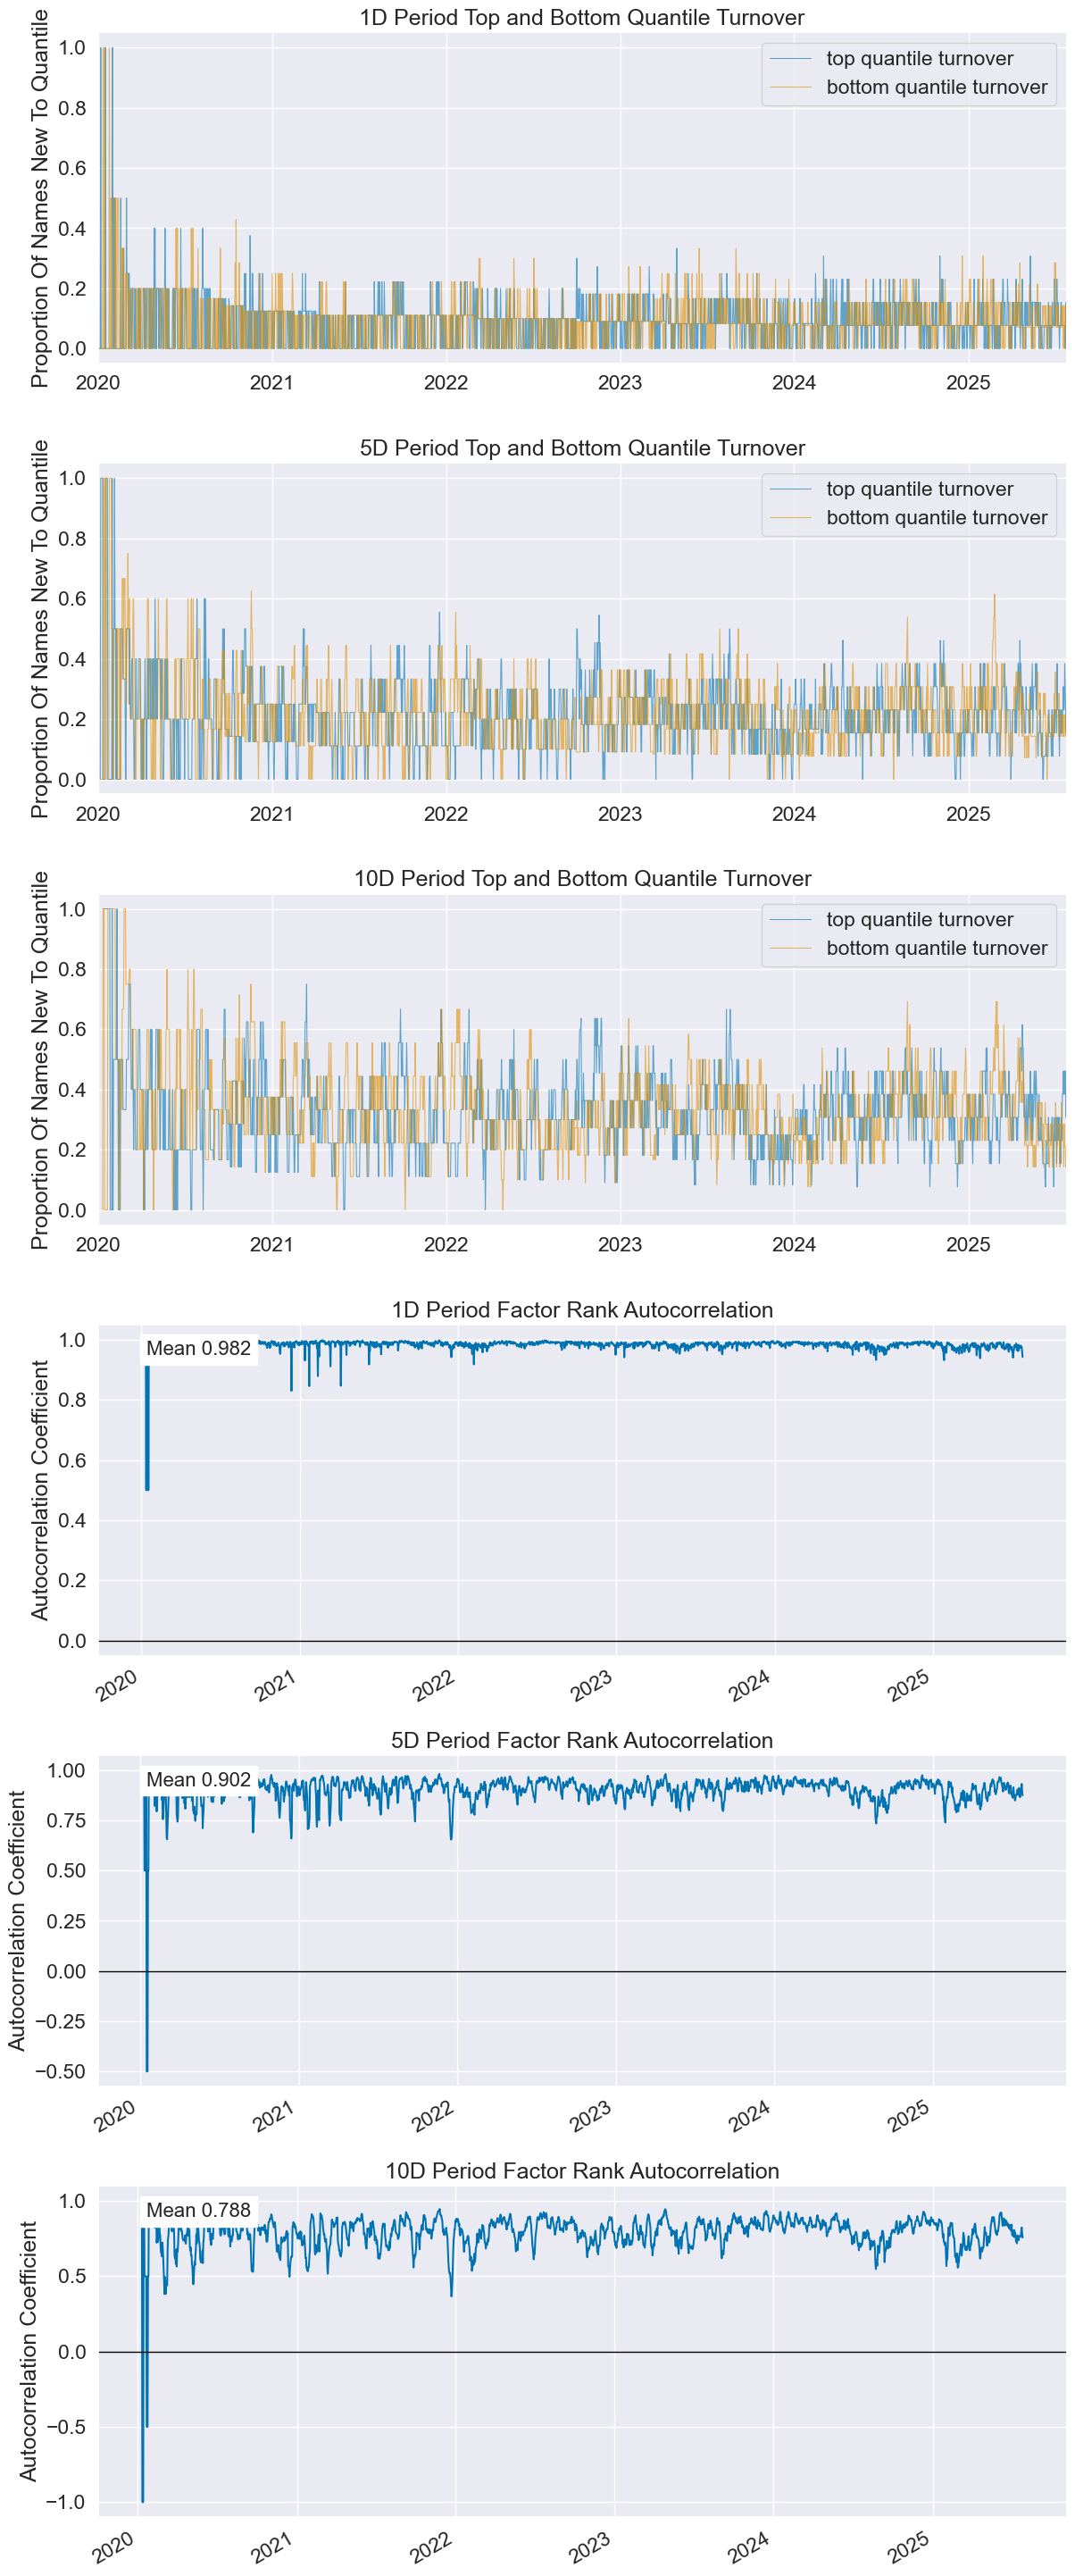

In [4]:

from analysis.utils import get_env

from analysis.alphalens import factor_analysis
from analysis.price import get_price_data
from api.portfolio.factors import get_portfolio_factors_historical
from api.portfolio.tickers import get_tickers

UNRAVEL_API_KEY = get_env("UNRAVEL_API_KEY")
portfolio = "altair"

available_tickers = get_tickers(portfolio, UNRAVEL_API_KEY, universe_size="20")
historical_factors = get_portfolio_factors_historical(
    portfolio, available_tickers, UNRAVEL_API_KEY
)

underlying = get_price_data(available_tickers)

columns_intersection = historical_factors.columns.intersection(underlying.columns)
factor_analysis(historical_factors[columns_intersection], underlying)